1. 차원축소의 3가지 접근법
<br>
    1) 피쳐선택(Feature Selection) : 불필요한 피처를 버린다.
    <br>
    2) 피쳐추출(Feature Extraction) : 피처를 선택하는 것이 아니라 더 작은 차원으로 피처를 매핑하는 것
        <br>
        - PCA, LDA, SVD, NMF
        <br>
    3) 피쳐생성(Feature Engineering) : 특성공학, 데이터 테이블에 피쳐가 부족한 상황일 때 적용하는 기법
<br><br>    
2. PCA
<br>
    1) 가장 대표적인 차원 축소 알고리즘
    <br>
    2) 여러 피쳐간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소한다.
    <br>
    3) PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는 이것이 PCA의 주성분이 된다.
<br><br>
3. PCA 수행과정
<br>
    1) 입력 데이터 셋의 공분산 행렬을 생성한다.
    <br>
    2) 공분산 행렬의 고유벡터와 고유값을 계산한다.
    <br>
    3) 고유값이 가장 큰 순으로 k개(PCA의 변환 차수)만큼 고유벡터를 추출한다.
    <br>
    4) 고유값이 가장 큰 순으로 추출된 고육벡터를 이용해 새롭게 입력 데이터를 변환한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

# 한글 폰트 설정
mpl.rc('font', family='D2Coding')
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus = False)

warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
plt.rc('figure', figsize=(10,8))

# 데이터셋 로딩

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(True)

In [4]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
type(X)

numpy.ndarray

In [6]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
columns = ['sepal_length',  'sepal_width', 'petal_length', 'petal_width']
iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df['target'] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 각 클래스별 데이터 분포 시각화

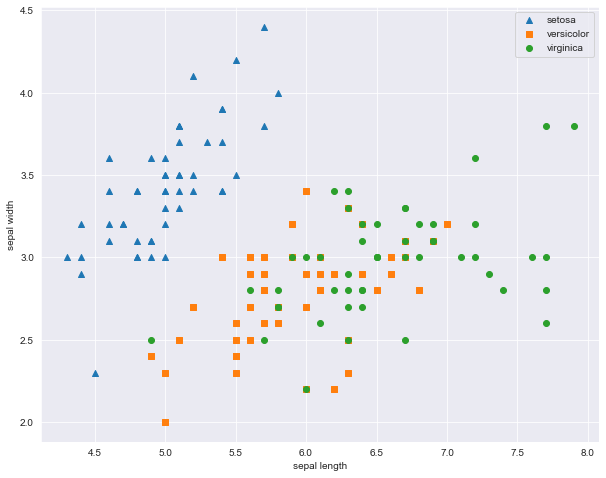

In [10]:
markers = ['^', 's', 'o']

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target'] == i]['sepal_length']
    y_axis_data = iris_df[iris_df['target'] == i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## 전처리 - 피처 스케일링
    - PCA는 여러 피쳐값을 연산하기에 스케일에 영향을 많이 받는다. 그래서 PCA 적용 전에 피처 스케일링 작업이 필요하다.

In [13]:
from sklearn.preprocessing import StandardScaler

# 타겟값을 제외한 피처 추출
iris_df_input = iris_df.iloc[:, :-1]
iris_scaled = StandardScaler().fit_transform(iris_df_input)
iris_scaled_df = pd.DataFrame(iris_scaled)
iris_scaled_df['target'] = iris_df.target
iris_scaled_df.describe()

,0,1,2,3,target
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02,150.000000
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15,1.000000
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00,0.819232
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00,0.000000
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00,0.000000
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01,1.000000
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01,2.000000
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00,2.000000


In [14]:
iris_f_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

## 주성분 분석을 통해 차원축소

In [16]:
from sklearn.decomposition import PCA

# 변환할 차원 수 입력
pca = PCA(n_components = 2)

# 스케일 데이터 => PCA 변환 데이터
pca.fit(iris_f_scaled)
iris_pca = pca.transform(iris_f_scaled)

# 변환후 차원 추출
print(f'스케일 데이터 : {iris_f_scaled.shape}')
print(f'PCA 변환 데이터 : {iris_pca.shape}')

스케일 데이터 : (150, 4)
PCA 변환 데이터 : (150, 2)


In [17]:
# PCA 데이터 프레임 생성
pca_columns = ['pca_component_1', 'pca_component_2']

iris_df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_df_pca['target'] = iris.target

iris_df_pca.head()

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


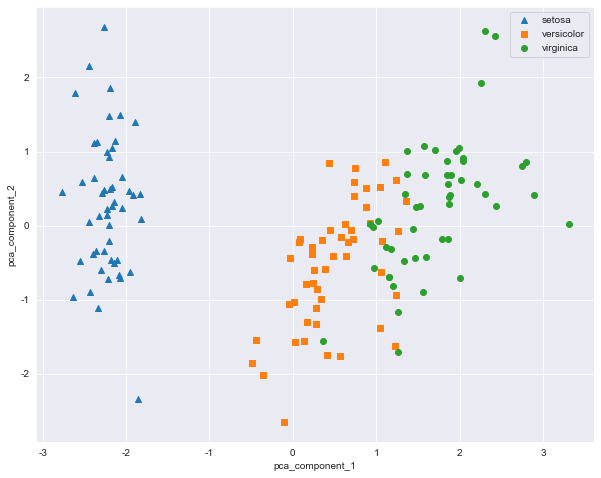

In [19]:
markers = ['^', 's', 'o']

# 0:setosa, 1:versicolor, 2:virginica
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_1']
    y_axis_data = iris_df_pca[iris_df_pca['target'] == i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [20]:
# component 변동성이 반영된 변동 비율
# explained_variance_ratio_ 속성 : 전체 변동성에서 개별 PCA 컴포넌트별 차지하는 변동성 비율
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

## PCA 변환 전/후 분류

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
scores = cross_val_score(rcf, iris_df.iloc[:, :-1], iris_df.target, scoring='accuracy', cv=3)

# 정확도
print(f'원본 데이터 fold별 정확도:{scores}')
print(f'원본 데이터 평균 정확도 :{np.mean(scores):.4f}')

원본 데이터 fold별 정확도:[0.98 0.94 0.96]
원본 데이터 평균 정확도 :0.9600


In [22]:
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(random_state=2022)

# 교차검증
pca_scores = cross_val_score(rcf, iris_df_pca.iloc[:, :-1], iris_df.target, scoring='accuracy', cv=3)

# 정확도
print(f'원본 데이터 fold별 정확도:{pca_scores}')
print(f'원본 데이터 평균 정확도 :{np.mean(pca_scores):.4f}')

원본 데이터 fold별 정확도:[0.88 0.88 0.9 ]
원본 데이터 평균 정확도 :0.8867


# UCI 신용카드 고객 데이터

In [23]:
# 첫 행 제거, ID 제거
df = pd.read_excel('C:/K_digital/source/data/credit.xls', header=1, sheet_name='Data').drop('ID',axis=1)

In [24]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
df.shape

(30000, 24)

- target : defalut~, 다음달 연체 여부를 의미(0: 정상납부, 1:연체)
- Pay_0 => Pay_1

In [26]:
# 컬럼명 변경
df.rename(columns = {'PAY_0':'PAY_1', 'default payment next month':'target'}, inplace=True)

In [27]:
X_features = df.drop('target', axis=1)
y_target = df.target

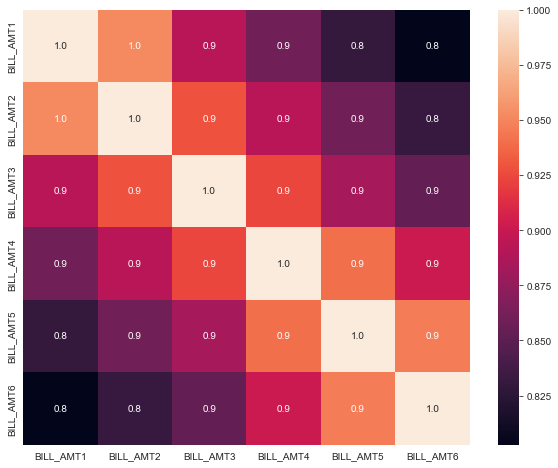

In [28]:
# 컬럼 BILL_AMT1 ~ BILL_AMT6
# 피처선택 : 불필요한 피처 제거 = 상관계수 값
cols_bill = ['BILL_AMT' + str(i) for i in range(1, 7)]

# 피처 상관관계
# corr = X_features.corr()

corr = X_features[cols_bill].corr()

sns.heatmap(corr, annot=True, fmt=".1f")
plt.show()

## PCA 변환 전 성능

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차검증
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3)

# 정확도
print(f'원본 데이터 fold별 정확도:{scores}')
print(f'원본 데이터 평균 정확도 :{np.mean(scores):.4f}')

원본 데이터 fold별 정확도:[0.8082 0.8217 0.8223]
원본 데이터 평균 정확도 :0.8174


In [41]:
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차검증
scores = cross_val_score(rcf, X_features[cols_bill], y_target, scoring='accuracy', cv=3)

# 정확도
print(f'원본 데이터 fold별 정확도:{scores}')
print(f'원본 데이터 평균 정확도 :{np.mean(scores):.4f}')

원본 데이터 fold별 정확도:[0.7693 0.7726 0.7752]
원본 데이터 평균 정확도 :0.7724


## PCA 변환 후 성능

In [39]:
# 피처 스케일링
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features)

# 차원축소 = 6
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_cols_scaled)

# 변동비율
print('PCA Componet별 변동성:', pca.explained_variance_ratio_)

PCA Componet별 변동성: [0.28448215 0.17818817 0.06743301 0.06401147 0.04457525 0.04161456]


In [40]:
# 분류 모델 : 랜덤포레스트
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차검증
pca_scores = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

# 정확도
print(f'원본 데이터 fold별 정확도:{pca_scores}')
print(f'원본 데이터 평균 정확도 :{np.mean(pca_scores):.4f}')

원본 데이터 fold별 정확도:[0.792  0.7975 0.8002]
원본 데이터 평균 정확도 :0.7966


In [42]:
# 피처 스케일링
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

# 차원축소 = 6
pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_cols_scaled)

# 변동비율
print('PCA Componet별 변동성:', pca.explained_variance_ratio_)

PCA Componet별 변동성: [0.90555253 0.0509867  0.01860826 0.01119301 0.00693446 0.00672504]


In [43]:
rcf = RandomForestClassifier(n_estimators=300, random_state=1017)

# 교차검증
pca_scores = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

# 정확도
print(f'원본 데이터 fold별 정확도:{pca_scores}')
print(f'원본 데이터 평균 정확도 :{np.mean(pca_scores):.4f}')

원본 데이터 fold별 정확도:[0.7741 0.7794 0.7805]
원본 데이터 평균 정확도 :0.7780
